# Systems of Differential Equations with Python

In many scientific and engineering problems, we encounter **systems of differential equations**—multiple equations involving several unknown functions. These systems are used to model interacting populations, electrical circuits, chemical reactions, and more.

This tutorial will introduce systems of ordinary differential equations (ODEs) and show how to solve them using Python.

---

## 1. What is a System of Differential Equations?

A **system of ODEs** consists of two or more interdependent differential equations. For example, a two-equation system:

$$
\begin{cases}
\frac{dx}{dt} = f_1(x, y, t) \\
\frac{dy}{dt} = f_2(x, y, t)
\end{cases}
$$

Here, $ x(t) $ and $ y(t) $ are unknown functions, and $ f_1 $ and $ f_2 $ describe how each variable changes over time.

---

## 2. Example: Predator-Prey (Lotka-Volterra) Model

A classic example is the **Lotka-Volterra equations** for predator-prey dynamics:

$$
\begin{cases}
\frac{dx}{dt} = \alpha x - \beta x y \\
\frac{dy}{dt} = \delta x y - \gamma y
\end{cases}
$$

- $ x $: Prey population
- $ y $: Predator population
- $ \alpha, \beta, \delta, \gamma $: Positive constants

---

## 3. Solving Systems of ODEs Numerically in Python

We use `scipy.integrate.solve_ivp` for numerical solutions.

### **Step 1: Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Matplotlib is building the font cache; this may take a moment.


### **Step 2: Define the System**

In [2]:
def lotka_volterra(t, z, alpha=1.1, beta=0.4, delta=0.1, gamma=0.4):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

### **Step 3: Set Initial Conditions and Time Span**

In [3]:
z0 = [10, 5]  # Initial populations: 10 prey, 5 predators
t_span = (0, 25)
t_eval = np.linspace(*t_span, 500)

### **Step 4: Solve the System**

In [4]:
sol = solve_ivp(lotka_volterra, t_span, z0, t_eval=t_eval)
x = sol.y[0]
y = sol.y[1]

### **Step 5: Plot the Results**

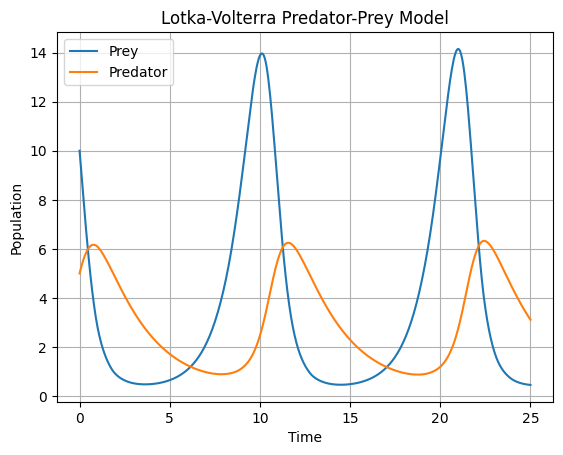

In [5]:
plt.plot(sol.t, x, label='Prey')
plt.plot(sol.t, y, label='Predator')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Predator-Prey Model")
plt.grid(True)
plt.show()

## 4. Generalizing to Larger Systems

For $ n $ equations, return an $ n $-element list from your system function and use an $ n $-element vector for initial conditions.

### **Example: 3-variable Linear System**

$$
\begin{cases}
\frac{dx}{dt} = 2x + y + z \\
\frac{dy}{dt} = x + 2y + z \\
\frac{dz}{dt} = x + y + 2z
\end{cases}
$$

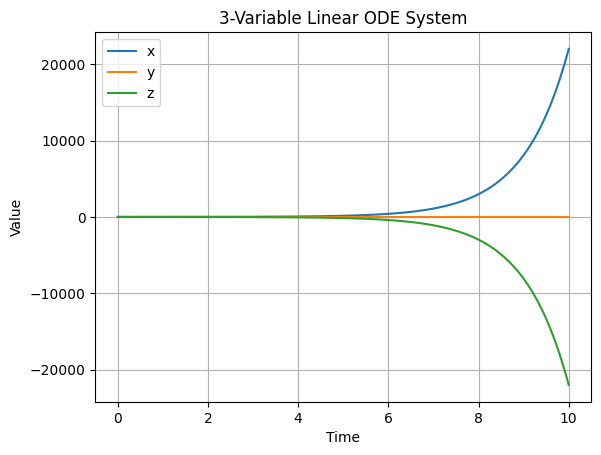

In [6]:
def system(t, u):
    x, y, z = u
    return [2*x + y + z, x + 2*y + z, x + y + 2*z]

u0 = [1, 0, -1]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 200)
sol = solve_ivp(system, t_span, u0, t_eval=t_eval)
plt.plot(sol.t, sol.y[0], label='x')
plt.plot(sol.t, sol.y[1], label='y')
plt.plot(sol.t, sol.y[2], label='z')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("3-Variable Linear ODE System")
plt.grid(True)
plt.show()

## 5. Symbolic Solutions for Linear Systems

Simple linear systems with constant coefficients can be solved symbolically using `sympy`.

In [7]:
from sympy import symbols, Function, Eq, dsolve
t = symbols('t')
x = Function('x')(t)
y = Function('y')(t)

eq1 = Eq(x.diff(t), 3*x + 4*y)
eq2 = Eq(y.diff(t), -4*x + 3*y)
sol = dsolve([eq1, eq2])
print(sol)

[Eq(x(t), C1*exp(3*t)*sin(4*t) + C2*exp(3*t)*cos(4*t)), Eq(y(t), C1*exp(3*t)*cos(4*t) - C2*exp(3*t)*sin(4*t))]


## 6. Summary

- Systems of ODEs model interacting variables in dynamic systems.
- Use `solve_ivp` from `scipy.integrate` for numerical solutions.
- Plot each variable to visualize system dynamics.
- Use `sympy` for analytical solutions of small linear systems.

---

# [Differential Equations Context](./README.md)